# Domain-adaptive deep network compression --- MNIST on LeNet

In [1]:
# automatically reload edited modules
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# main libraries
import numpy as np
import tensorflow as tf
from copy import deepcopy
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display

In [3]:
# specific libraries
import train_net
from models import LeNet
from utils import plot_utils
from utils import mnist_utils

In [4]:
# check available devices
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

[u'/device:CPU:0']


### Load dataset and define model

In [5]:
mnist = mnist_utils.load_mnist_32x32()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples
Labels: [0 1 2 3 4 5 6 7 8 9]
Original Image Shape: (28, 28, 1)
Updated Image Shape: (32, 32, 1)


In [6]:
sess = tf.InteractiveSession()
# define input and target placeholders
x = tf.placeholder(tf.float32, shape=[None, 32, 32, 1])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
# instantiate new model
model = LeNet.LeNet(x, y_)
# initialize variables
sess.run(tf.global_variables_initializer())

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



### Train network from scratch

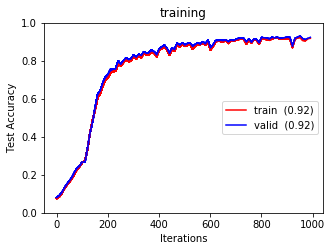

In [7]:
train_net.train_net(sess, model, x, y_, data=mnist, num_iter=1000, disp_freq=10, batch_size=100, lr=0.01)

### Testing without compression

In [8]:
train_net.test_net(sess, model, x, y_, data=mnist)
model.count_params()

Accuracy on test data is 92.3300027847%
Number of parameters in network is 61706.
Number of parameters in CONV is 2572.
Number of parameters in FC is 59134.


### Testing with compression

In [9]:
# Activations -- use validation set for extracting activation statistics
model.get_activations(mnist.validation.images, sess, num_samples=1000)

In [10]:
# Apply SVD or DALR -- first two values have to be zero (for the conv layers)
#model.compute_svd(sess, keep=[0, 0, 15, 15, 10])
model.compute_dalr(sess, keep=[0, 0, 15, 15, 10], lam=10)

In [11]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
# define input and target placeholders
x = tf.placeholder(tf.float32, shape=[None, 32, 32, 1])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
# construct new model
model.compressed_model_FC(x,y_)
# initialize variables
sess.run(tf.global_variables_initializer())

Instructions for updating:
Please switch to tf.train.get_or_create_global_step


In [12]:
train_net.test_net(sess, model, x, y_, data=mnist)
model.count_params()

Accuracy on test data is 86.4300012589%
Number of parameters in network is 10966.
Number of parameters in CONV is 2572.
Number of parameters in FC is 8394.
